In [1]:
import pandas as pd
from vowpalwabbit import pyvw
from vowpalwabbit.DFtoVW import (
    DFtoVW,
    Feature,
    MulticlassLabel,
)
from vowpalwabbit.DFtoVWtoTBorTW import VWtoTensorboard, VWtoTensorwatchStreamer, VWtoTensorwatchClient, DFtoVWtoTBorTW 

# necessary for tensorwatch to visualize for now
%matplotlib notebook 

In [2]:
df = pd.read_csv('./Iris.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# converting "Species" categorical column to integer
df['Species'] = df['Species'].map({'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3})
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [5]:
target_col = "Species"

# features = [Feature(col) for col in df.columns if col != target_col]  # target column not part of Features
features = [Feature(col) for col in df.columns if col not in [target_col, 'Id']]  # 'Id' column also not part of Features along with target col
label = MulticlassLabel(label=target_col)  # target column is a multi class label column
tag = 'Id'

df_to_vw = DFtoVW(df=df, features=features, label=label, tag=tag)

In [6]:
vw = pyvw.vw('--oaa 3 -P 1')  # -oaa is One Agent All algo for multi class problem (seems supervised) -P 1 outputs metrics for each example

### For Tensorbaord

In [7]:
logdir = './logs'
vw_to_tb = VWtoTensorboard(logdir)

In [8]:
df_to_tb = DFtoVWtoTBorTW(df_to_vw.convert_df(), vw)
df_to_tb.fit(vw_to_tensorboard=vw_to_tb)  # If VWtoTensorboard instance is passed, then run the command `tensorboard --logdir logs` in the examples directory

vw_to_tb.draw_reductions_graph(vw)
vw_to_tb.show_args_as_text(vw)

### For Tensorwatch

In [9]:
logfile = './iris.log'
vw_to_tw = VWtoTensorwatchStreamer(logfile, 4001)

[Debug][0]: FileStream started : /home/ammar/vowpal_wabbit/python/examples/iris-df-to-vw-to-tensorboard-tensorwatch/iris.log : t=2.86


In [10]:
df_to_tb = DFtoVWtoTBorTW(df_to_vw.convert_df(), vw)
df_to_tb.fit(vw_to_tensorwatch=vw_to_tw)

[Debug][0]: FileStream started : /home/ammar/vowpal_wabbit/python/examples/iris-df-to-vw-to-tensorboard-tensorwatch/iris.log : t=4.04
[Debug][0]: FileStream started : /home/ammar/vowpal_wabbit/python/examples/iris-df-to-vw-to-tensorboard-tensorwatch/iris.log : t=4.04
[Debug][0]: FileStream started : /home/ammar/vowpal_wabbit/python/examples/iris-df-to-vw-to-tensorboard-tensorwatch/iris.log : t=4.04
[Debug][0]: FileStream started : /home/ammar/vowpal_wabbit/python/examples/iris-df-to-vw-to-tensorboard-tensorwatch/iris.log : t=4.04


<IPython.core.display.Javascript object>


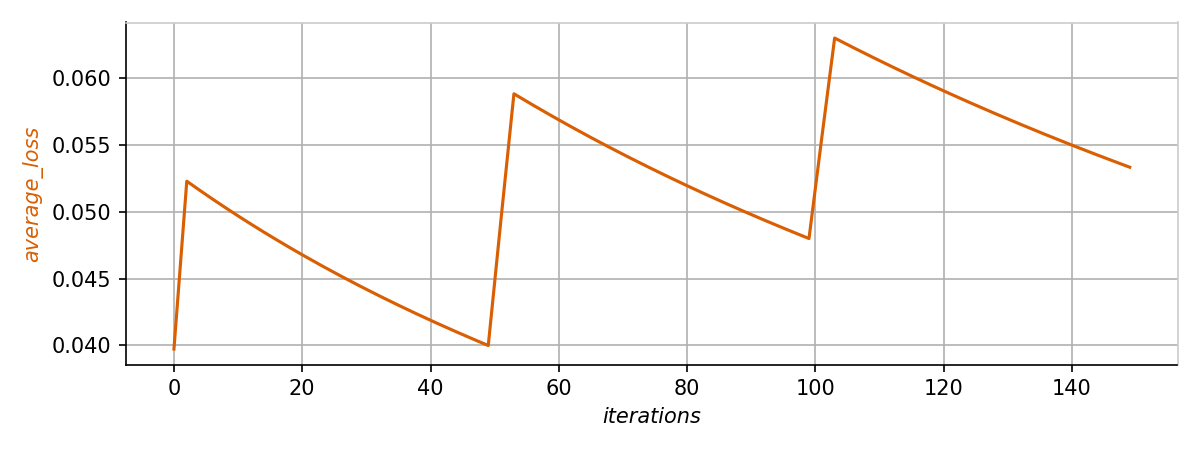

Widget Javascript not detected.  It may not be installed or enabled properly.


<IPython.core.display.Javascript object>


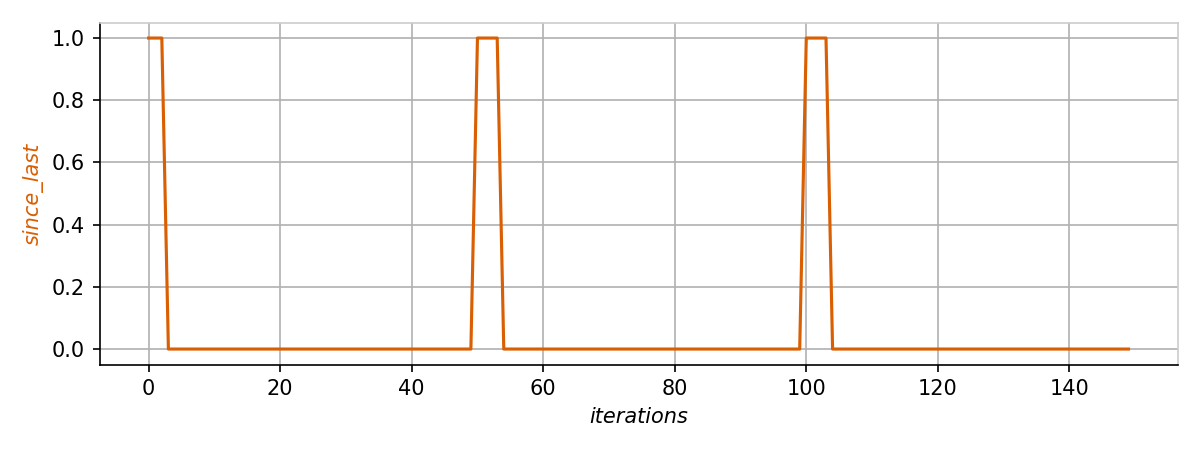

Widget Javascript not detected.  It may not be installed or enabled properly.


<IPython.core.display.Javascript object>


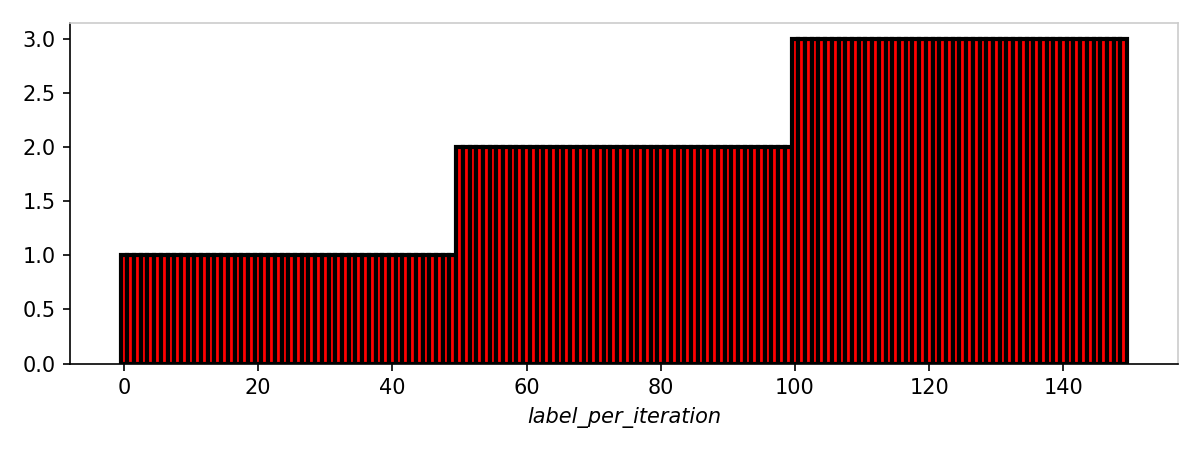

Widget Javascript not detected.  It may not be installed or enabled properly.


<IPython.core.display.Javascript object>


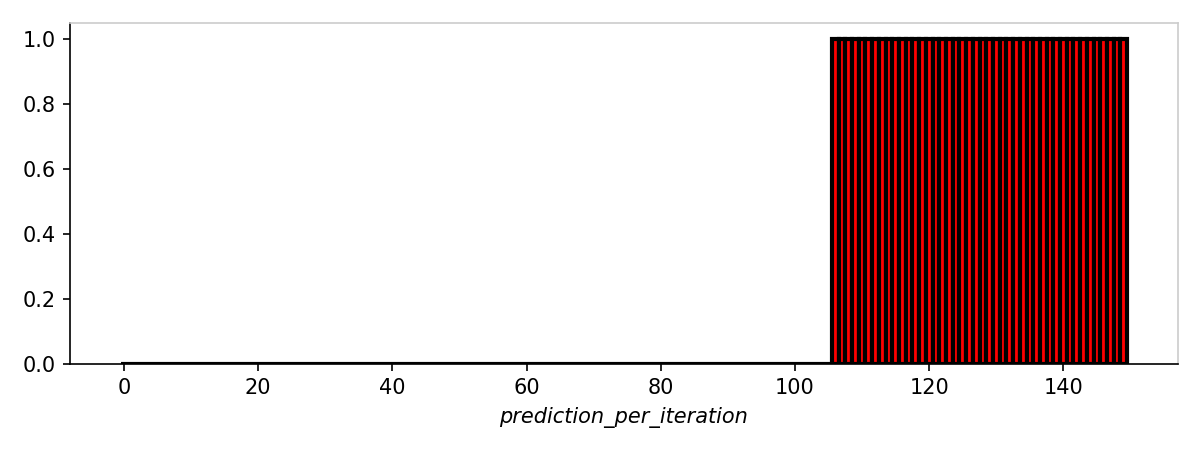

Widget Javascript not detected.  It may not be installed or enabled properly.


In [11]:
vw_to_tw_client = VWtoTensorwatchClient(logfile, 4001)
vw_to_tw_client.plot_metrics()